# Linear Regression with Python
## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Check out the Data

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

## Exploratory Data Analysis

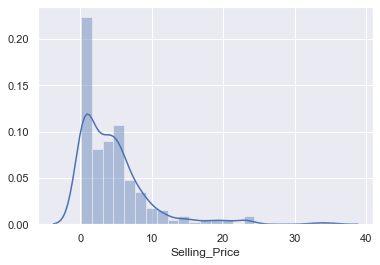

In [7]:
sns.distplot(df['Selling_Price'])

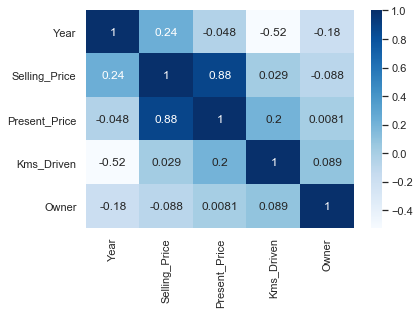

In [8]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

## Training and Testing Data

In [9]:
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner']]
y = df[['Selling_Price']]

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

## Training the Model

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting Test Data

In [24]:
predictions = lm.predict(X_test)

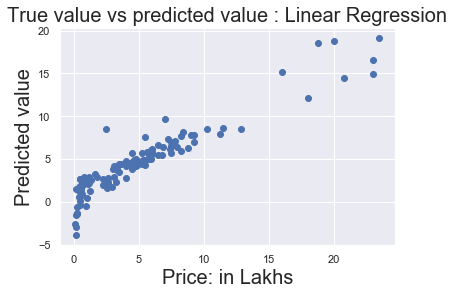

In [36]:
plt.scatter(y_test, predictions)
plt.xlabel("Price: in Lakhs", size = 20)
plt.ylabel("Predicted value", size = 20)
plt.title("True value vs predicted value : Linear Regression", size = 20)
plt.show()

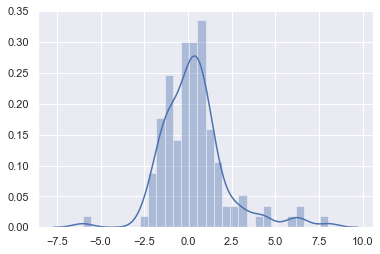

In [37]:
sns.distplot((y_test-predictions) , bins=30)

## Evaluating the Model

In [38]:
from sklearn import metrics
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE:  1.309719241033856
MSE:  3.6702419183551838
RMSE: 1.9157875452030644
